In [127]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
#making corpus or words from comments
import re
from nltk.stem.porter import PorterStemmer
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, f1_score

In [128]:
dataset = pd.read_csv('ROMAN URDU DATASET.csv')

In [129]:
dataset.head(5)

,Comment,sentiment,nan
0,Sai kha ya her kisi kay bus ki bat nhi hai lak...,Positive,NaN
1,sahi bt h,Positive,NaN
2,"Kya bt hai,",Positive,NaN
3,Wah je wah,Positive,NaN
4,Are wha kaya bat hai,Positive,NaN


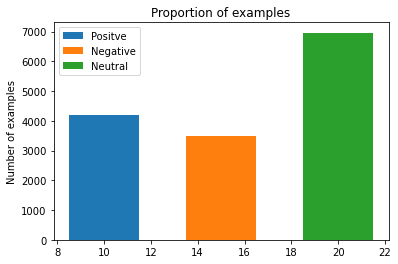

In [130]:
Pos = dataset[dataset['sentiment'] == 'Positive'].shape[0]
Neg = dataset[dataset['sentiment'] == 'Negative'].shape[0]
Neu = dataset[dataset['sentiment'] == 'Neutral'].shape[0]
# bar plot of the 3 classes
plt.bar(10,Pos,3, label="Positve")
plt.bar(15,Neg,3, label="Negative")
plt.bar(20,Neu,3, label="Neutral")
plt.legend()
plt.ylabel('Number of examples')
plt.title('Proportion of examples')
plt.show()

In [131]:
# label selection
y=dataset.iloc[:,1].values
labelEnocder_y=LabelEncoder()
y=labelEnocder_y.fit_transform(y)

# 2 postive 0 negative 1 nuetral

In [132]:

corpus=[]
stopwords=['ai', 'ayi', 'hy', 'hai', 'main', 'ki', 'tha', 'koi', 'ko', 'sy', 'woh', 'bhi', 'aur', 'wo', 'yeh', 'rha', 'hota', 'ho', 'ga', 'ka', 'le', 'lye', 'kr', 'kar', 'lye', 'liye', 'hotay', 'waisay', 'gya', 'gaya', 'kch', 'ab', 'thy', 'thay', 'houn', 'hain', 'han', 'to', 'is', 'hi', 'jo', 'kya', 'thi', 'se', 'pe', 'phr', 'wala', 'waisay', 'us', 'na', 'ny', 'hun', 'rha', 'raha', 'ja', 'rahay', 'abi', 'uski', 'ne', 'haan', 'acha', 'nai', 'sent', 'photo', 'you', 'kafi', 'gai', 'rhy', 'kuch', 'jata', 'aye', 'ya', 'dono', 'hoa', 'aese', 'de', 'wohi', 'jati', 'jb', 'krta', 'lg', 'rahi', 'hui', 'karna', 'krna', 'gi', 'hova', 'yehi', 'jana', 'jye', 'chal', 'mil', 'tu', 'hum', 'par', 'hay', 'kis', 'sb', 'gy', 'dain', 'krny', 'tou']
for i in range(0,14646):
    review = re.sub('[^a-zA-Z]',' ',dataset.iloc[:,0].values[i])
    review=review.lower()
    review=review.split()
    review=[word for word in review if not word in stopwords]
    review=' '.join(review)
    corpus.append(review)
    

In [133]:
cv=CountVectorizer(max_features=2500)
x=cv.fit_transform(corpus).toarray()

In [134]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [135]:
text_classifier = KNeighborsClassifier(n_neighbors=3)
text_classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [136]:
y_pred=text_classifier.predict(x_test)

In [137]:
cm=confusion_matrix(y_test,y_pred)

In [138]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))


[[221 393  97]
 [366 896 134]
 [181 432 210]]
              precision    recall  f1-score   support

           0       0.29      0.31      0.30       711
           1       0.52      0.64      0.57      1396
           2       0.48      0.26      0.33       823

    accuracy                           0.45      2930
   macro avg       0.43      0.40      0.40      2930
weighted avg       0.45      0.45      0.44      2930

0.45290102389078496


In [139]:
print('Accuracy is {} '.format(accuracy_score(y_test, y_pred)))

Accuracy is 0.45290102389078496 


<ipython-input-140-a4c09c4060a8>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-140-a4c09c4060a8>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


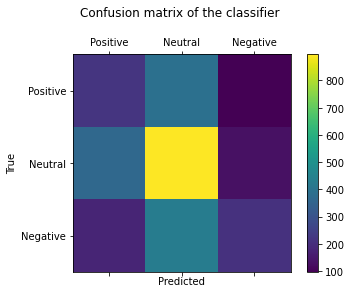

In [140]:
labels=['Positive','Neutral','Negative']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier \n')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()